In [15]:
# import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as tick
plt.style.use('fivethirtyeight')
from wordcloud import WordCloud
from collections import Counter
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/floramatos/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [16]:
# load data
tweets_df = pd.read_csv('/Users/floramatos/Desktop/Final_Project/Files/resources/dataset/clean_tweets_consolidated.csv')
tweets_df.head()

,location,tweetcreatedts,text,country
0,India,2022-03-01,urges government to rescue student along wit...,india
1,"Stoney Creek, Ontario",2022-03-01,moscow underground sometimes the act of resis...,canada
2,"Los Angeles, CA",2022-03-01,via video game industry shares support for u...,usa
3,Australia,2022-03-01,tomlinson had planned stops in kyiv on july ...,australia
4,Ukraine,2022-03-01,stop russian aggression against close the ...,ukraine


In [17]:
len(tweets_df)

964329

In [18]:
# define function to edit large tick values
def edit_tick_values(tick_val, pos):
    if tick_val >= 1000:
        val = round(tick_val/1000, 1)
        new_tick_format = '{:}K'.format(val)
    elif tick_val < 1000:
        new_tick_format = round(tick_val, 1)
    else:
        new_tick_format = tick_val
    
    # make new_tick_format into a string value
    new_tick_format = str(new_tick_format)
    
    # code below will keep 4.5M as is but change values such as 4.0M to 4M since that zero after the decimal isn't needed
    index_of_decimal = new_tick_format.find(".")
    
    if index_of_decimal != -1:
        value_after_decimal = new_tick_format[index_of_decimal+1]
        if value_after_decimal == "0":
            # remove the 0 after the decimal point since it's not needed
            new_tick_format = new_tick_format[0:index_of_decimal] + new_tick_format[index_of_decimal+2:]
            
    return new_tick_format

# from https://dfrieds.com/data-visualizations/how-format-large-tick-values.html

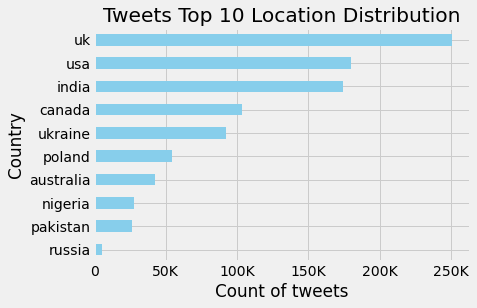

<Figure size 1152x648 with 0 Axes>

In [19]:
# get distribution of tweets by top 10 location
country = tweets_df['country'].value_counts()
country[0:10].sort_values().plot(kind='barh', title='Tweets Top 10 Location Distribution', rot=0, color='skyblue')
plt.ylabel('Country')
plt.xlabel('Count of tweets')
ax = plt.gca()
ax.xaxis.set_major_formatter(tick.FuncFormatter(edit_tick_values));
plt.figure(figsize=(16,9))
plt.show()

In [20]:
# Save image
# plt.to_file("resources/images/locations_plot.png")

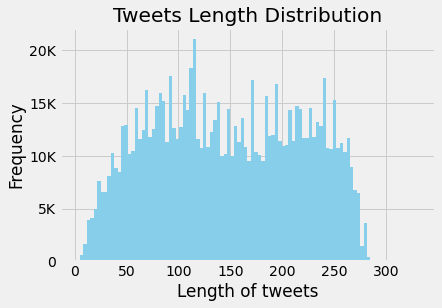

<Figure size 1152x648 with 0 Axes>

In [21]:
# plot the length of the tweet
tweets_df['length']= tweets_df['text'].apply(len)
tweets_df['length'].plot(kind='hist', bins=100, title='Tweets Length Distribution', rot=0, color='skyblue')
plt.xlabel('Length of tweets')
ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(edit_tick_values));
plt.figure(figsize=(16,9))
plt.show()

In [ ]:
# Save image
# plt.to_file("resources/images/tweet_length_plot.png")

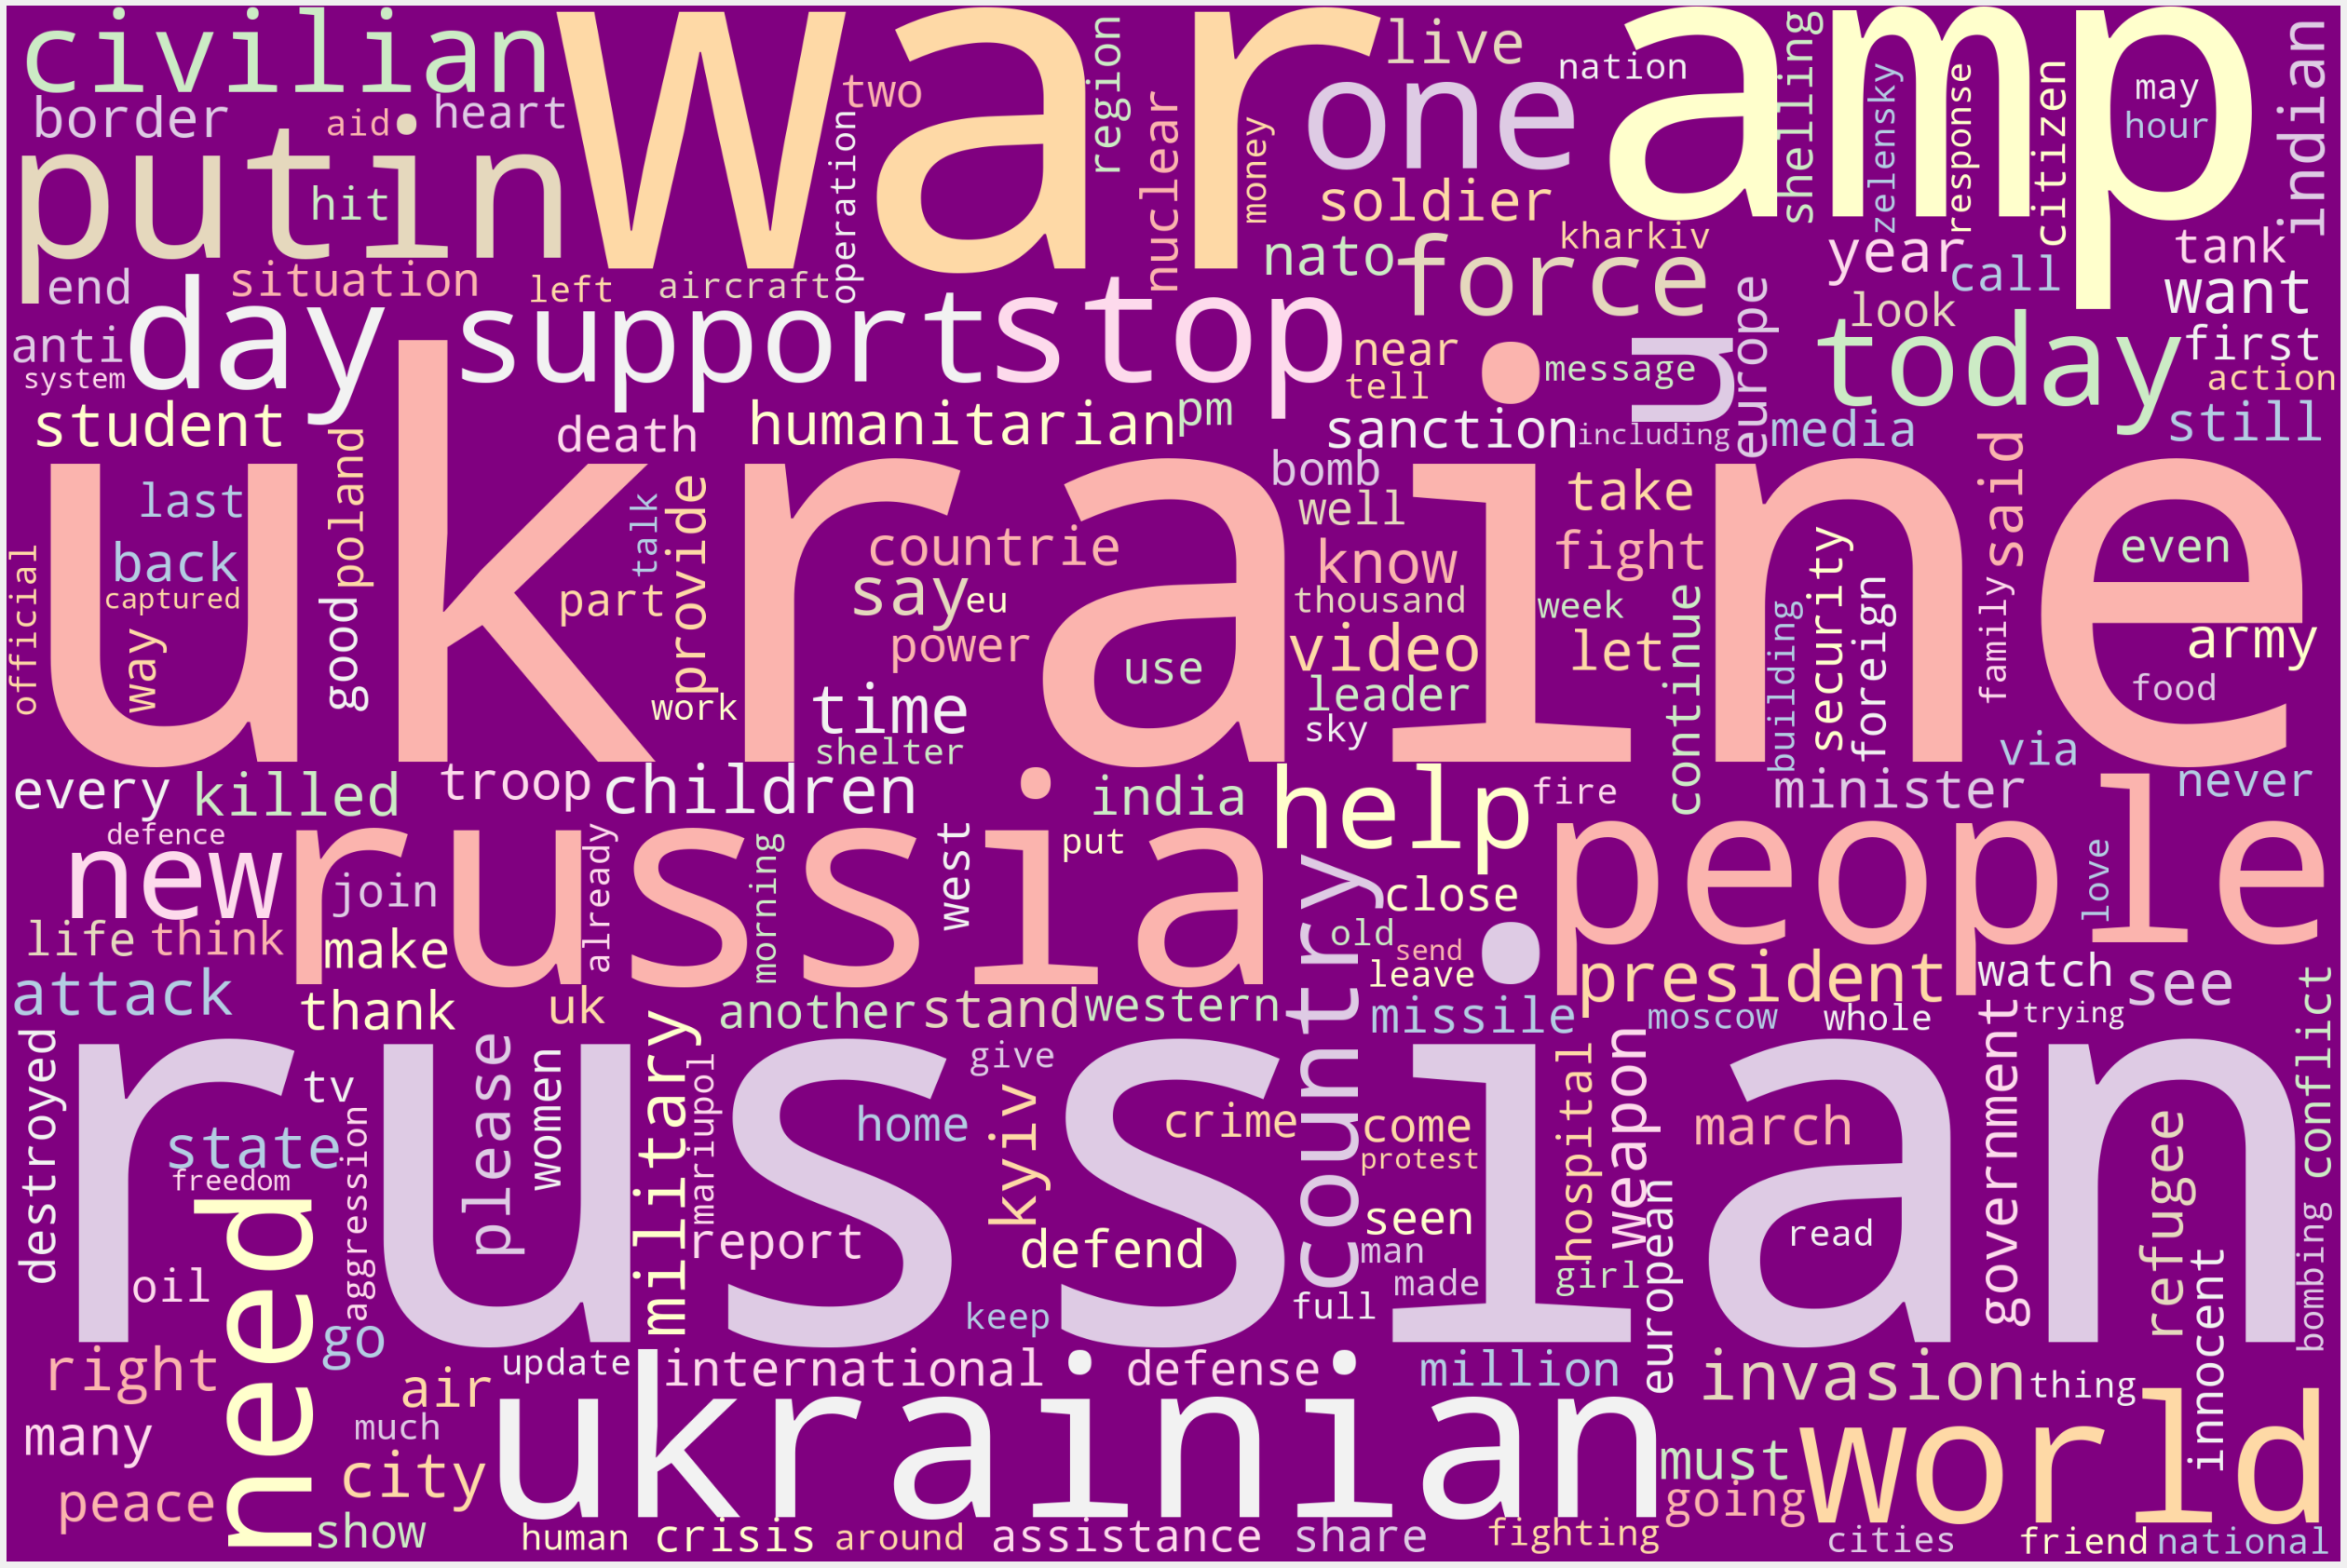

In [26]:
# remove stopwords using nltk
stoplist = stopwords.words('english')
tweets_df["text_without_stopwords"] = tweets_df["text"].apply(lambda x: ' '.join([word for word in x.split() if word not in (stoplist)]))
text = tweets_df["text_without_stopwords"].values
words = ' '.join([words for words in text])
wordcloud = WordCloud(width= 3000, height = 2000, background_color="purple", colormap='Pastel1', random_state=1, collocations=False).generate(words)
plt.figure(figsize=(40, 30))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [27]:
# Save image
wordcloud.to_file("resources/images/wordcloud_nltk.png")

In [28]:
word_count = Counter(words.split()).most_common()
word_count

[('ukraine', 185741),
 ('russian', 168075),
 ('war', 142460),
 ('amp', 126258),
 ('russia', 118214),
 ('people', 103589),
 ('ukrainian', 82469),
 ('putin', 75608),
 ('world', 66487),
 ('us', 58672),
 ('one', 49363),
 ('stop', 47964),
 ('today', 45889),
 ('support', 44667),
 ('help', 40781),
 ('country', 38300),
 ('like', 38208),
 ('president', 36723),
 ('invasion', 35871),
 ('military', 35742),
 ('children', 33559),
 ('forces', 32060),
 ('please', 30631),
 ('day', 29977),
 ('kyiv', 29696),
 ('city', 29076),
 ('see', 27441),
 ('need', 27377),
 ('time', 27364),
 ('would', 26684),
 ('civilians', 25905),
 ('weapons', 25812),
 ('humanitarian', 25775),
 ('said', 25272),
 ('new', 24884),
 ('killed', 24560),
 ('video', 24083),
 ('indian', 23426),
 ('army', 22892),
 ('needs', 22795),
 ('want', 22783),
 ('must', 22777),
 ('says', 22709),
 ('nato', 22609),
 ('go', 22578),
 ('know', 22297),
 ('students', 22008),
 ('get', 21219),
 ('ukrainians', 21055),
 ('many', 20957),
 ('also', 20891),
 ('govern